In [1]:
from poppy.creatures import PoppyErgoJr

poppy = PoppyErgoJr()



### Encore une instruction pour bouger
**QUESTIONS **

1. Lorsque la liste *pos* contient 6 angles en degrés, que permet de faire le jeu d'instructions suivant ? 
    * Le jeu d'instructions suivant permet de faire aller les moteurs de la liste *poppy.motors* à la position correspondante de la liste *pos* en 0,5 seconde et d'attendre que le mouvement soit terminé pour passer à l'instruction suivante.
2. Quelle différence avec *m.goal_position = 30* par exemple ? 
    * Ici, on a la possibilité d'attendre que le mouvement se termine pour passer au suivant. Le déplacement ne se fait pas à la vitesse *m.moving_speed*.
    * Par ailleurs, on obtient des mouvements plus harmonieux.

In [3]:
pos = [-20, -20, 40, -30, 40, 20]
i = 0
for m in poppy.motors:
    m.compliant = False
    m.goto_position(pos[i], 0.5, wait = True)
    i = i + 1


Found marker 76697084 at [ 250.25   90.5 ]
76697084
Found marker 80826986 at [ 237.75  323.75]
80826986
Found marker 82737172 at [ 445.25  334.5 ]
82737172
Found marker 78698884 at [ 441.5    87.75]
78698884


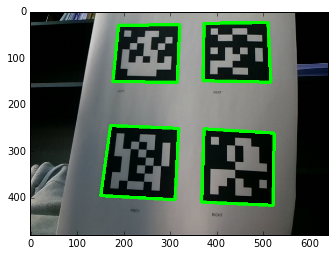

In [7]:
# importation des outils nécessaires 
import cv2
%matplotlib inline
import matplotlib.pyplot as plt
from hampy import detect_markers

# affichage de l'image capturée
img = poppy.camera.frame
plt.imshow(img)
# récupère dans une liste les marqueurs trouvés dans l'image
markers = detect_markers(img)

valeur = 0  
for m in markers:
    print('Found marker {} at {}'.format(m.id, m.center))
    m.draw_contour(img)
    valeur = m.id
    print(valeur)

In [8]:
markers


[<Marker id=76697084 center=[ 250.25   90.5 ]>,
 <Marker id=80826986 center=[ 237.75  323.75]>,
 <Marker id=82737172 center=[ 445.25  334.5 ]>,
 <Marker id=78698884 center=[ 441.5    87.75]>]

### Quelques remarques : 
* *markers* est une liste, elle contient les identifiants des marqueurs trouvés et la position du centre.
* plusieurs marqueurs peuvent être trouvés dans une même image capturée. 
* *m* est un itérateur qui parcourt ici la liste des marqueurs. 
* l'instruction *m.draw_coutour(img)* permet de dessiner les contours des marqueurs dans l'image *img*.

In [ ]:
import time
RIGH = 82737172

LEFT = 76697084

NEXT = 78698884

PREV = 80826986
# la variable liste_moteur permet de n'avoir à modifier 
# le nom du conteneur du robot qu'une fois.
# Si on ne l'a pas instancié en tant que poppy par exemple
liste_moteur = [m for m in poppy.motors]
num_moteur = 0
#éteindre toutes les leds des moteurs
for i in range (0,6): 
    liste_moteur[i].led = 'pink'
# tant que le dernier moteur n'est pas atteint    
while num_moteur < 6: 
    #capturer une image et détecter si elle comporte un marqueur
    img = poppy.camera.frame
    markers = detect_markers(img)
    valeur = 0  
        
    for m in markers:
        print 'Found marker {} at {}'.format(m.id, m.center)
        m.draw_contour(img)
        valeur = m.id
        print(valeur)
    # mettre la led du moteur courant au rouge
    liste_moteur[num_moteur].led = 'red'
    # effectuer l'action correspondant au marqueur détecté
    if valeur == RIGH: 
        liste_moteur[num_moteur].led = 'green'
        liste_moteur[num_moteur].goto_position(
            liste_moteur[num_moteur].present_position - 5, 
            0.5, 
            wait = True)
        liste_moteur[num_moteur].led = 'pink'
        valeur = 0

    if valeur == PREV: 
        if num_moteur != 0: 
            liste_moteur[num_moteur].led = 'pink'
            num_moteur = num_moteur - 1
            liste_moteur[num_moteur].led = 'red'
            time.sleep(2.0)
        valeur = 0
        
    if valeur == LEFT: 
        liste_moteur[num_moteur].led = 'green'
        liste_moteur[num_moteur].goto_position(
            liste_moteur[num_moteur].present_position + 5,
            0.5,
            wait = True)
        liste_moteur[num_moteur].led = 'pink'
        valeur = 0
        
    if valeur ==  NEXT:
        if num_moteur != 6: 
            liste_moteur[num_moteur].led = 'pink'
            num_moteur = num_moteur + 1
            if num_moteur != 6:
                liste_moteur[num_moteur].led = 'red'
            time.sleep(2.0)
        valeur = 0    
            




Auteur : Georges Saliba, Lycée Victor Louis, Talence, sous [licence CC BY SA](https://creativecommons.org/licenses/by-nc-sa/3.0/fr/) 